In [5]:
from datasetADNI import AdniImagesDataset
from dataloaderADNI import split_train_test, get_kfCV_loaders
import matplotlib.pyplot as plt
from very_deep_models.deep_BN import ConvNet
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import seaborn as sns
import os
import pandas as pd

from numpy.random import default_rng

In [2]:
dataset = AdniImagesDataset("data_balanced", unique_subjects=True)

Classes = {'AD': 0, 'MCI': 1, 'CN': 2}


KeyboardInterrupt: 

In [ ]:
loaders=get_kCV_loaders(dataset, n_classes=3, k=5, batch_size=8, num_workers=16)

In [ ]:
for train_loader, val_loader  in loaders:
    print(train_loader, val_loader)

In [ ]:
data, label = dataset.__getitem__(100)
print(data.shape)




In [6]:
label

tensor(0)

In [5]:
dataset1 = getPathToUniqueSubjectScans("data_balanced")
dataset2 = getPathToUniqueSubjectScans("data_balanced")
dataset3 = getPathToUniqueSubjectScans("data_balanced")

Classes = {'AD': 0, 'MCI': 1, 'CN': 2}
Classes = {'AD': 0, 'MCI': 1, 'CN': 2}
Classes = {'AD': 0, 'MCI': 1, 'CN': 2}


In [10]:
dataset2==dataset3

True

In [7]:
train_loader, val_loader, test_loader = get_loaders(dataset=dataset, n_classes=3, batch_size=8)

Train dataset size=294. Validation dataset size=96. Test dataset size=96


In [8]:
examples = iter(train_loader)
samples, labels = examples.next()

In [9]:
samples.shape

torch.Size([8, 1, 160, 160, 96])

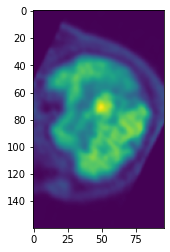

In [8]:
plt.imshow(data[0][:][:][50])

In [22]:
d = 2  # the dimension to iterate

x = np.arange(5*5*5).reshape((5,5,5))
s = slice(None)  # :
std = np.std(x)
mean = np.mean(x)
for i in range(5):
    slicer = [s]*3  # [:, :, :]
    slicer[d] = i   # [:, :, i]
    print(x[slicer]) # x[:, :, i]

[[  0   5  10  15  20]
 [ 25  30  35  40  45]
 [ 50  55  60  65  70]
 [ 75  80  85  90  95]
 [100 105 110 115 120]]
[[  1   6  11  16  21]
 [ 26  31  36  41  46]
 [ 51  56  61  66  71]
 [ 76  81  86  91  96]
 [101 106 111 116 121]]
[[  2   7  12  17  22]
 [ 27  32  37  42  47]
 [ 52  57  62  67  72]
 [ 77  82  87  92  97]
 [102 107 112 117 122]]
[[  3   8  13  18  23]
 [ 28  33  38  43  48]
 [ 53  58  63  68  73]
 [ 78  83  88  93  98]
 [103 108 113 118 123]]
[[  4   9  14  19  24]
 [ 29  34  39  44  49]
 [ 54  59  64  69  74]
 [ 79  84  89  94  99]
 [104 109 114 119 124]]


<ipython-input-22-3b944ad6ed79>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print(x[slicer]) # x[:, :, i]


In [25]:
(x-mean)/std

array([[[-1.71824939, -1.69053569, -1.66282199, -1.63510829,
         -1.60739459],
        [-1.57968089, -1.55196719, -1.52425349, -1.49653979,
         -1.46882609],
        [-1.44111239, -1.41339869, -1.38568499, -1.35797129,
         -1.33025759],
        [-1.30254389, -1.27483019, -1.24711649, -1.21940279,
         -1.19168909],
        [-1.16397539, -1.13626169, -1.10854799, -1.08083429,
         -1.05312059]],

       [[-1.02540689, -0.99769319, -0.96997949, -0.94226579,
         -0.91455209],
        [-0.88683839, -0.85912469, -0.83141099, -0.80369729,
         -0.77598359],
        [-0.74826989, -0.72055619, -0.69284249, -0.66512879,
         -0.63741509],
        [-0.6097014 , -0.5819877 , -0.554274  , -0.5265603 ,
         -0.4988466 ],
        [-0.4711329 , -0.4434192 , -0.4157055 , -0.3879918 ,
         -0.3602781 ]],

       [[-0.3325644 , -0.3048507 , -0.277137  , -0.2494233 ,
         -0.2217096 ],
        [-0.1939959 , -0.1662822 , -0.1385685 , -0.1108548 ,
         -0

In [11]:
for i, (x, y) in enumerate([("a","y"),("b","z"),("c","x")]):
    print(i,x,y)

0 a y
1 b z
2 c x


In [16]:
l=5
l/=2
print(l)

2.5


In [19]:
ta=[1,2,3,4]
tl=[1,2,3,4]
va=[1,2,3,4]
vl=[1,2,3,4]

for i,(ta,tl,va,vl) in enumerate(zip(ta,tl,va,vl)):
    print(i,ta,tl,va,vl)

0 1 1 1 1
1 2 2 2 2
2 3 3 3 3
3 4 4 4 4


In [71]:
default_rng().choice(np.arange(0, 3, dtype=int), size=3, replace=False)

array([2, 1, 0])

In [3]:
m = nn.LogSoftmax(dim=1)

loss = nn.NLLLoss()

input = torch.randn(5, 3, requires_grad=False)

target = torch.tensor([2, 0, 0, 2, 0])

loss(m(input), target)

tensor(1.2593)

In [14]:
target = torch.tensor([2, 0, 0, 2, 0])
m(input)

tensor([[-2.8353, -1.0746, -0.5111],
        [-0.5975, -1.3314, -1.6836],
        [-0.9329, -1.0892, -1.3089],
        [-1.2208, -1.6585, -0.6644],
        [-0.3908, -1.6573, -2.0187]])

In [15]:
loss(m(input), target)

tensor(0.6193)

In [11]:
model = ConvNet()
model.load_state_dict(torch.load("models/baseline/eval_grads_CNN_batchSize_8"))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion(m(input))

TypeError: forward() missing 1 required positional argument: 'target'

In [22]:
########################################
#### THESE FUNCTIONS HAVE THE PURPOSE
#### OF CALCULATING CERTAIN SCORES.
#######################################

# get_stats()
########################################################################################################################
## This function gives multi-class
## TP FP TN FN
## Used for calculating precision, sensitivity, specificity, FPR, FNR etc.
def get_stats(true, pred, classes):
    stats = {}
    for c in classes:
        stats[c] = {}
        for situation in ["TP","FP","TN","FN"]: ## True positive, False Positive, True Negative, False Negative
            stats[c][situation] = 0
            
    for c in classes:
        for (current_truth, current_prediction) in zip(true,pred):
            
            if c == current_truth:  ## The class is seen as positive positive
            
                if current_truth == current_prediction: ## TP
                    stats[c]["TP"] += 1
                else:                                  ## FN
                    stats[c]["FN"] += 1
            
            else:  ## The class is seen as negative
                if c == current_prediction:            ## FP
                    stats[c]["FP"] += 1
                else:                                  ## TN
                    stats[c]["TN"] += 1
                
    return stats
#-----------------------------------------------------------------------------------------------------------------------


# get_score()
########################################################################################################################
## Returns a certain score, depending on class.
## Must give dictionary containig TP FN FP TN of the different classes
def get_score(stats, c, score):
    score = score.lower()
    if score == "precision":
        return stats[c]["TP"] / (stats[c]["TP"] + stats[c]["FP"])
    
    elif score == "sensitivity":
        return stats[c]["TP"] / (stats[c]["TP"] + stats[c]["FN"])
    
    elif score == "specificity":
        return stats[c]["TN"] / (stats[c]["TN"] + stats[c]["FP"])
    
    elif score == "fpr":
        return stats[c]["FP"] / (stats[c]["FP"] + stats[c]["TN"])
    
    elif score == "fnr":
        return stats[c]["FN"] / (stats[c]["FN"] + stats[c]["TP"])
    
    else:
        raise Exception(f"{score} can't be found in the function 'get_score'. The only available scores for now are, [Precision, Sensitivity, Specificity, FPR, FNR]") 
#-----------------------------------------------------------------------------------------------------------------------


# calc_intresting_statistics()
########################################################################################################################
## This function returns a dict containing
## precision, sensitivity, specificity, FPR, FNR etc.
## for every class.
def calc_intresting_statistics(true, pred, classes):
    stats = get_stats(true, pred, classes)
    scores = {}
    for c in classes:
        scores[c] = {}
        for score in ["Precision", "Sensitivity", "Specificity", "FPR", "FNR"]: ## True positive, False Positive, True Negative, False Negative
            scores[c][score] = get_score(stats, c, score)
    return scores
#-----------------------------------------------------------------------------------------------------------------------





In [23]:
true = np.array([0,0,1,1,2,2])
pred = np.array([0,1,0,1,2,2])

get_stats(true, pred, [0,1,2])

{0: {'TP': 1, 'FP': 1, 'TN': 3, 'FN': 1},
 1: {'TP': 1, 'FP': 1, 'TN': 3, 'FN': 1},
 2: {'TP': 2, 'FP': 0, 'TN': 4, 'FN': 0}}

In [24]:
true = np.array([0,0,1,1,2,2])
pred = np.array([0,0,1,1,2,2])

get_stats(true, pred, [0,1,2])

{0: {'TP': 2, 'FP': 0, 'TN': 4, 'FN': 0},
 1: {'TP': 2, 'FP': 0, 'TN': 4, 'FN': 0},
 2: {'TP': 2, 'FP': 0, 'TN': 4, 'FN': 0}}

In [26]:
true = np.array([0,0,1,1,2,2])
pred = np.array([0,1,0,1,2,2])

calc_intresting_statistics(true, pred, [0,1,2])

{0: {'Precision': 0.5,
  'Sensitivity': 0.5,
  'Specificity': 0.75,
  'FPR': 0.25,
  'FNR': 0.5},
 1: {'Precision': 0.5,
  'Sensitivity': 0.5,
  'Specificity': 0.75,
  'FPR': 0.25,
  'FNR': 0.5},
 2: {'Precision': 1.0,
  'Sensitivity': 1.0,
  'Specificity': 1.0,
  'FPR': 0.0,
  'FNR': 0.0}}

In [2]:
from ilm import ilm_IN, ilm_LN, ilm_GN

In [5]:
tmp_ilm_in = ilm_IN(40)
tmp_ilm_ln = ilm_LN(40)
tmp_ilm_gn = ilm_GN(channels=40, num_groups=10)

In [6]:
tmp_ilm_in.forward(torch.rand((5,40,160,160,96))).shape

torch.Size([5, 40, 160, 160, 96])

In [7]:
tmp_ilm_ln.forward(torch.rand((5,40,160,160,96))).shape

torch.Size([5, 40, 160, 160, 96])

In [8]:
tmp_ilm_gn.forward(torch.rand((5,40,160,160,96))).shape

x.shape: torch.Size([5, 10, 1, 9830400])


torch.Size([5, 40, 160, 160, 96])

In [2]:
from baseline_ILM_GN import ConvNet

model = ConvNet()

In [50]:
import os
import torch
from torch.utils.data import Dataset
import nibabel as nib
import numpy as np

class AdniImagesDataset(Dataset):
    ### root - Should contain root folder of all the sub-directories and files. Example, data/AD/xxxx.nii or data/MCI/xxxx.nii.
    ###        AdniImagesDataset only accepts .nii files and the classes will be based on the sub-directories e.g., AD.
    ###        Note that the folder containing the data must be organized as follows, root/class/filename.extension
    
    def __init__(self, root, transforms=None):
        self.images_list, self.targets = self.__getImgsAndTargets(root)
        self.transforms = transforms
        
    def __len__(self):
        return len(self.images_list)

    def __getitem__(self, idx):
        data = self.images_list[idx]
        target = self.targets[idx]
        if self.transforms:
            self.transforms(data)
        
        return data, target
    
        
########################## HELPER FUNCTIONS ######################## 
    
    def __standardize(self, img):
        mean = np.mean(img)
        std = np.std(img)
        return (img-mean)/std
    
    def __getClasses(self, root):
        classes = {}
        for val, key in enumerate(next(os.walk(root))[1]):
            classes[key] = val
        print(f"Classes = {classes}")
        return classes
    
    
    def __getPaths(self, root):
        lst = []
        for root, dirs, files in os.walk(root):
            for file in files:
                if file.endswith(".nii") and len(dirs) == 0: # dirs is now part of 'root' string and dont include dirs in path since it'll show as an empty list []
                    lst.append(f'{root}/{file}')
        return lst
    
    
    def __getImgsAndTargets(self, root):
        imgs = []
        targets = []
        classes = self.__getClasses(root)
        for image_path in self.__getPaths(root):
            imgs.append( torch.from_numpy( self.__standardize( np.asarray(nib.load(image_path).dataobj).reshape((1,160,160,96)) ) ).float() ) 
            targets.append( classes[image_path.split("/")[1]] )
            
        #return imgs, torch.nn.functional.one_hot( torch.tensor(targets) )
        return imgs, torch.tensor(targets) # No need to OneHot encode if using CrossEntropyloss
    
########################## HELPER FUNCTIONS END ########################

In [2]:
def standardize(self, img):
        mean = np.mean(img)
        std = np.std(img)
        return (img-mean)/std
    
def getClasses(root):
    classes = {}
    for val, key in enumerate(next(os.walk(root))[1]):
        classes[key] = val
    print(f"Classes = {classes}")
    return classes


def getPaths(root):
    lst = []
    for root, dirs, files in os.walk(root):
        for file in files:
            if file.endswith(".nii") and len(dirs) == 0: # dirs is now part of 'root' string and dont include dirs in path since it'll show as an empty list []
                lst.append(f'{root}/{file}')
    return lst


def getImgsAndTargets(root):
    imgs = []
    targets = []
    classes = getClasses(root)
    for image_path in getPaths(root):
        imgs.append( torch.from_numpy( self.__standardize( np.asarray(nib.load(image_path).dataobj).reshape((1,160,160,96)) ) ).float() ) 
        targets.append( classes[image_path.split("/")[1]] )

    return imgs, torch.tensor(targets) # No need to OneHot encode if using CrossEntropyloss
    
def getPathToUniqueSubjectScans(root):
    imgs = {}
    path = getPaths(root)
    paths = {}
    for i, image_path in enumerate(path):
        tmp = image_path.split("_")
        key = f"{tmp[1]}_{tmp[2]}_{tmp[3]}_{tmp[4]}"
        
        if i == 758: ## specifically at this index of all the paths, the name varies slightly, thus index 14 is needed for date
            new_date = int(tmp[14])
        else:
            new_date = int(tmp[16])
            
        if key in imgs:    
            old_date = imgs[key]
            if old_date > new_date:
                imgs[key] = new_date
                paths[key] = image_path
        else:
            imgs[key] = new_date
            paths[key] = image_path
            
    ## If there is unequal amount of cases (which there is), remove so there always are equal amount of cases
    balanced_cases_paths = []
    paths = list(paths.values())
    counts = {}
    
    for case in getClasses(root):
        counts[case] = 0
        
    for path in paths:
        case = path.split("/")[1]
        counts[case] += 1
       
    min_num_case = min(counts.values())
    for d in counts:
        counts[d] -= min_num_case
    
    for path in paths:
        case = path.split("/")[1]
        if counts[case] > 0:
            counts[case] -= 1
        else:
            balanced_cases_paths.append(path)
    
    return balanced_cases_paths

In [19]:
def train_test(dataset, n_classes, test_ratio=0.2):
    if test_ratio >= 1.0 or test_ratio < 0:
        raise Exception(f"test_ratio={test_ratio} isn't compatible.")
        
    train_idx = []
    test_idx = []
    classes_idx = []
    class_size = int(len(dataset)/n_classes)
    class_test_size = int(test_ratio*class_size)
    print(class_size)
    print(class_test_size)
    print(class_test_size/class_size)
    ## Create list of lists of class indices.
    ## Each sub-list has class indices
    for i in range(n_classes):
        start_idx = i*class_size
        end_idx = start_idx+class_size
        classes_idx.append(list( range(start_idx, end_idx) ))
    
    ## Splits train and test indices 
    for cx in classes_idx:
        tmp_test = cx[:class_test_size]
        train_idx.extend( list(set(cx)-set(tmp_test)) )
        test_idx.extend(tmp_test)
        print(len(train_idx))
        print(len(test_idx))
        break
    ## Return subsets
    return torch.utils.data.Subset(dataset, train_idx), torch.utils.data.Subset(dataset, test_idx)

In [7]:
#tmp = getImgsAndTargets("data_balanced")
tmp = AdniImagesDataset("data_balanced")

Classes = {'AD': 0, 'MCI': 1, 'CN': 2}
Counts = {'AD': 486, 'MCI': 486, 'CN': 486}


In [20]:
train_dataset, test_dataset = train_test(tmp, n_classes=3, test_ratio=0.2)
print(f"train_dataset = {len(train_dataset)}, test_dataset = {len(test_dataset)}")

486
97
0.19958847736625515
389
97
train_dataset = 389, test_dataset = 97


In [5]:
tmp = AdniImagesDataset("data_balanced", unique_subjects=True)

Classes = {'AD': 0, 'MCI': 1, 'CN': 2}
Counts = {'AD': 112, 'MCI': 112, 'CN': 112}


In [21]:
train_dataset, test_dataset = train_test(tmp, n_classes=3, test_ratio=0.2)
print(f"train_dataset = {len(train_dataset)}, test_dataset = {len(test_dataset)}")

486
97
0.19958847736625515
389
97
train_dataset = 389, test_dataset = 97


In [4]:
x = [1,2,3]

In [10]:
list( range(0,10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
97/(97+389)

0.19958847736625515

In [3]:
#from ilm import forward_stats_catcher_BN
#import torch

y = torch.Tensor([[[0], [1]], [[10],[100]]])
y_mean = y.mean(-1, keepdim=True)
print(y.shape)
print(y)
print(y_mean.shape)
print(y_mean)

torch.Size([2, 2, 1])
tensor([[[  0.],
         [  1.]],

        [[ 10.],
         [100.]]])
torch.Size([2, 2, 1])
tensor([[[  0.],
         [  1.]],

        [[ 10.],
         [100.]]])


In [72]:
fsc_bn = forward_stats_catcher_BN(5, 2)

In [73]:
from timeit import default_timer as timer

x = torch.randn((3,5,2,2,2))

start = timer()
_ = fsc_bn(x)
end = timer()

print(end - start)

torch.Size([5])
torch.Size([5])
0.0029388628900051117


In [4]:
x = torch.Tensor( [[ [[0], [1]], [[2], [3]]],  [ [[4], [5]], [[6], [7]] ] ,  [[[8], [9]], [[10], [11]] ]])

#x = x.view(1,-1)
print(x.shape)
print(x.mean(0, keepdim=True))

torch.Size([3, 2, 2, 1])
tensor([[[[4.],
          [5.]],

         [[6.],
          [7.]]]])


In [5]:
print(x)
print(x.shape)

tensor([[[[ 0.],
          [ 1.]],

         [[ 2.],
          [ 3.]]],


        [[[ 4.],
          [ 5.]],

         [[ 6.],
          [ 7.]]],


        [[[ 8.],
          [ 9.]],

         [[10.],
          [11.]]]])
torch.Size([3, 2, 2, 1])


In [15]:
from timeit import default_timer as timer

start = timer()
t = x.view(3,2,-1)
t.mean()
end = timer()
print(end - start)
print(t.shape, "\n")
print(t,"\n")
print(t.mean(-1, keepdim = True).shape)
print(t.mean([-1, 0], keepdim = True).shape)

0.000794529914855957
torch.Size([3, 2, 20]) 

tensor([[[ 0.3430, -0.3793,  1.6213, -0.0493, -1.0258, -0.9259,  0.1588,
           0.0413, -0.0779,  0.7518, -1.0267, -1.1631,  0.9280, -0.1611,
          -1.0946, -2.3258, -1.2048, -0.2085, -0.3832, -0.3357],
         [ 0.2720,  1.3013, -0.1177,  0.9440, -0.5257, -1.7958,  0.6299,
          -0.2338,  0.9445,  0.5527, -0.1457,  0.5905,  0.7126,  0.2417,
           0.7021,  0.4451, -1.0617, -0.4843, -1.2575,  1.3810]],

        [[-0.0033,  1.6348,  2.2459, -0.9224, -1.1109, -0.0219,  0.1527,
          -0.2796,  0.1289,  0.1073,  1.5192,  0.2578, -0.0692,  0.2607,
           0.2899, -0.3403,  0.0509,  0.0660,  1.3022, -2.2958],
         [ 0.5519, -1.0334, -0.2552,  0.3104,  1.2209, -0.4280,  0.2073,
          -1.1668,  1.2863,  1.9434,  0.1890,  0.9501,  0.2968, -0.9316,
          -0.0313, -1.0722, -1.3676,  0.0612,  0.9924, -0.6462]],

        [[ 0.4189, -1.8132,  1.0929,  0.8120, -0.2267, -0.4050, -0.2045,
          -0.5870,  1.1891,  0.74

In [86]:
f = torch.Tensor([ [[ [[1]] ], [ [[1]] ] ] ])
print(f.shape)
#z = t.mean([-1, 0], keepdim = True).squeeze()
z = torch.Tensor([ [[ [[10]] ], [ [[20]] ] ] ])
print(z.shape)
print(z)
(z*f)+f

torch.Size([1, 2, 1, 1, 1])
torch.Size([1, 2, 1, 1, 1])
tensor([[[[[10.]]],


         [[[20.]]]]])


tensor([[[[[11.]]],


         [[[21.]]]]])

In [69]:
class forward_stats_catcher_BN(nn.Module):
    def __init__(self, channels, embed_size, eps=1e-5):
        super(forward_stats_catcher_BN, self).__init__()
        assert channels > 0
        assert embed_size < channels
        
        self.eps = eps
        self.channels = channels
        self.embed_size = embed_size

        self.fc_embed = nn.Sequential(
            nn.Linear(self.channels, self.embed_size, bias=False),
            nn.ReLU(inplace=True)
        )
        
        self.fc_weight = nn.Sequential(
            self.fc_embed,
            nn.Linear(self.embed_size, self.channels, bias=False),
            nn.Sigmoid()
        )

        self.fc_bias = nn.Sequential(
            self.fc_embed,
            nn.Linear(self.embed_size, self.channels, bias=False),
            nn.Tanh()
        )
        
        self.running_mean = torch.zeros(channels)
        self.running_var = torch.zeros(channels)
        
        self.weight_bias = nn.Parameter(torch.ones(1, channels, 1, 1, 1))
        self.bias_bias = nn.Parameter(torch.zeros(1, channels, 1, 1, 1))


    def forward(self, x):
        b, c, d, h, w = x.size()
        
        mean = x.view(b, c, -1).mean([-1, 0], keepdim=True).squeeze()
        var = x.view(b, c, -1).var([-1, 0], keepdim=True).squeeze()
        
        weight = self.fc_weight(mean)
        weight = weight[None, :, None, None, None] + self.weight_bias
        
        bias = self.fc_bias(var)
        bias = bias[None, :, None, None, None] + self.bias_bias
        
        if self.training:
            ## X_hat_new = (1−momentum) × X_hat + momentum × x_t , where X_hat is the estimated statistic and x_t is the new observed value.
            ## See pytorch documentation on batch norm for how running mean and var are calculated using momentum.
            self.running_mean = 0.9 * self.running_mean + 0.1 * mean ## momentum is 0.1 since that is what was used in batch norm on the BN model lacking statistics from forward pass
            self.running_var = 0.9 * self.running_var + 0.1 * var  ## momentum is 0.1 since that is what was used in batch norm on the BN model lacking statistics from forward pass
            
            x = (x - mean[None, :, None, None, None]) / (var + self.eps).sqrt()[None, :, None, None, None]
        else:
            x = (x - self.running_mean[None, :, None, None, None]) / (self.running_var + self.eps).sqrt()[None, :, None, None, None]
            
        return (x * weight[None, :, None, None, None]) + bias[None, :, None, None, None]

In [ ]:
for image_path in self.__getPathToUniqueSubjectScans(root, classes):

In [62]:
arr = []
for image_path in getPathToUniqueSubjectScans("data_balanced"):
    t = image_path.split("_")
    arr.append(t[2]+t[3]+t[4])
arr = np.asarray(arr)
print(len(arr))
print(len(np.unique(arr,return_counts=True)[0]))
print(len(np.unique(arr,return_counts=True)[1]))
print(sum(np.unique(arr,return_counts=True)[1]!=1))

Classes = {'AD': 0, 'MCI': 1, 'CN': 2}
336
336
336
0


In [25]:
import torch
from very_deep_models.deep_BN import ConvNet
from timeit import default_timer as timer

x = torch.randn((5,1,160,160,96)).to("cuda:0")
lr = 0.0001
model = ConvNet().to("cuda:0")

In [4]:

start = timer()
model(x)
end = timer()
print(end-start)

torch.Size([5, 5, 159, 159, 95]) 

torch.Size([5, 5, 158, 158, 94]) 

torch.Size([5, 5, 157, 157, 93]) 

torch.Size([5, 5, 156, 156, 92]) 

torch.Size([5, 5, 155, 155, 91]) 

torch.Size([5, 10, 77, 77, 45]) 

torch.Size([5, 10, 76, 76, 44]) 

torch.Size([5, 10, 75, 75, 43]) 

torch.Size([5, 10, 74, 74, 42]) 

torch.Size([5, 10, 73, 73, 41]) 

torch.Size([5, 10, 72, 72, 40]) 

torch.Size([5, 20, 36, 36, 20]) 

torch.Size([5, 20, 35, 35, 19]) 

torch.Size([5, 20, 34, 34, 18]) 

torch.Size([5, 20, 33, 33, 17]) 

torch.Size([5, 20, 32, 32, 16]) 

torch.Size([5, 20, 31, 31, 15]) 

torch.Size([5, 40, 15, 15, 7]) 

torch.Size([5, 80, 7, 7, 3]) 

torch.Size([5, 11760]) 

torch.Size([5, 65]) 

torch.Size([5, 40]) 

torch.Size([5, 20]) 

torch.Size([5, 3]) 

0.6166462507098913


In [26]:
df = pd.read_csv("deep_gradients.csv", sep=";")

df['mean'] = df['mean'].str.replace(',','.')
df['variance'] = df['variance'].str.replace(',','.')

df["mean"] = pd.to_numeric(df["mean"])
df["variance"] = pd.to_numeric(df["variance"])

In [27]:
df

,model,epoch,layer,mean,variance
0,deep_baseline_8,1st,conv1,3.720000e-10,4.520000e-19
1,deep_baseline_8,1st,conv10,1.350000e-08,1.930000e-15
2,deep_baseline_8,1st,fc3,7.700000e-04,8.040000e-06
3,deep_baseline_8,50th,conv1,6.790000e-10,1.930000e-18
4,deep_baseline_8,50th,conv10,3.360000e-08,6.220000e-14
5,deep_baseline_8,50th,fc3,2.000000e-03,6.140000e-05
6,deep_baseline_8,100th,conv1,2.310000e-10,2.410000e-19
7,deep_baseline_8,100th,conv10,1.140000e-08,2.220000e-15
8,deep_baseline_8,100th,fc3,1.280000e-03,4.250000e-05
9,deep_BN_8,1st,conv1,8.190000e+01,2.590000e+04


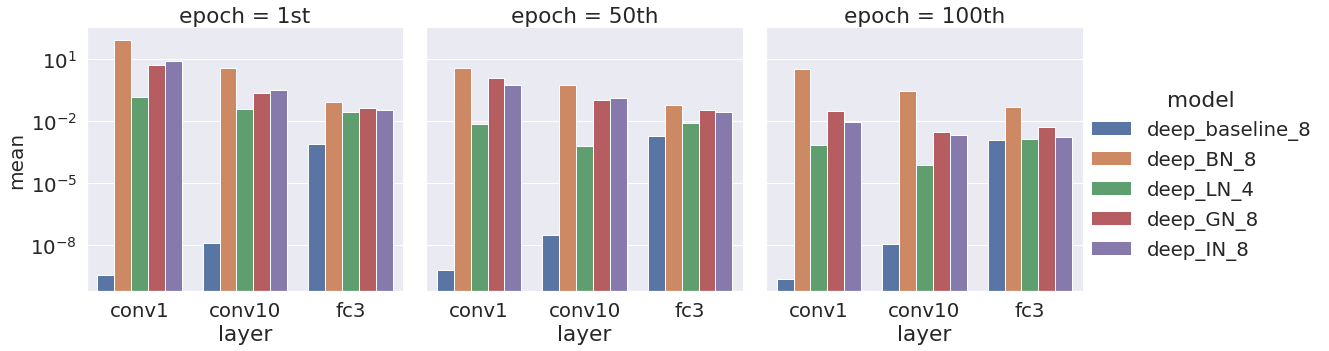

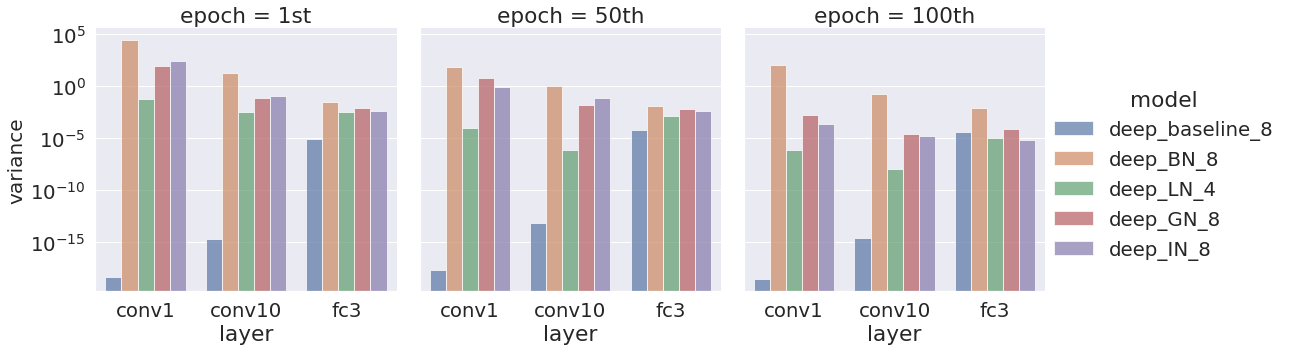

In [28]:
sns.set(font_scale=1.8)
g = sns.catplot(x="layer", y="mean", hue="model", col="epoch", data=df, kind="bar").set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('mean', fontsize=20)
plt.savefig("deep_mean_grad_bar_plot.png", dpi=100,bbox_inches="tight")

g = sns.catplot(x="layer", y="variance", hue="model", col="epoch", data=df, kind="bar", alpha=0.7).set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('variance', fontsize=20)
plt.savefig("deep_var_grad_bar_plot.png", dpi=100, bbox_inches="tight")

In [38]:
df1 = pd.read_csv("deep_gradients_NM.csv", sep=";")

df1['mean'] = df1['mean'].str.replace(',','.')
df1['variance'] = df1['variance'].str.replace(',','.')

df1["mean"] = pd.to_numeric(df1["mean"])
df1["variance"] = pd.to_numeric(df1["variance"])

In [39]:
df1

,model,epoch,layer,mean,variance
0,deep_ILM_GN_8,1st,conv1,3.600000,75.710000
1,deep_ILM_GN_8,1st,conv10,0.170000,0.029000
2,deep_ILM_GN_8,1st,fc3,0.050000,0.007800
3,deep_ILM_GN_8,50th,conv1,1.360000,6.299000
4,deep_ILM_GN_8,50th,conv10,0.130000,0.034400
5,deep_ILM_GN_8,50th,fc3,0.040000,0.007900
6,deep_ILM_GN_8,100th,conv1,0.035000,0.002300
7,deep_ILM_GN_8,100th,conv10,0.002300,0.000007
8,deep_ILM_GN_8,100th,fc3,0.004000,0.000036
9,deep_ILM_IN_2,1st,conv1,4.847500,54.000000


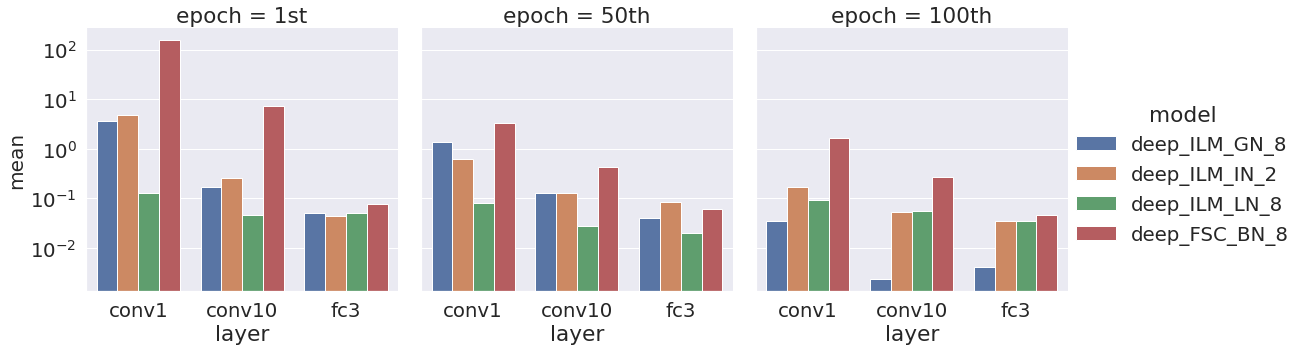

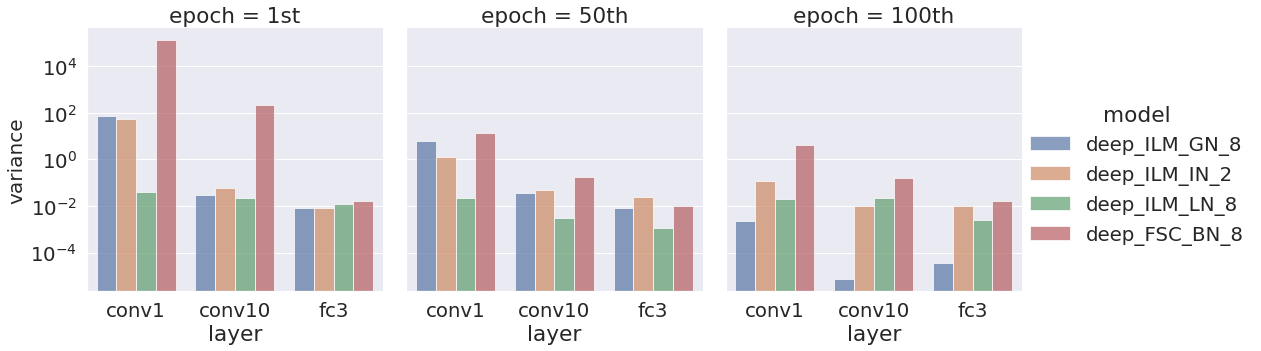

In [40]:
sns.set(font_scale=1.8)
g = sns.catplot(x="layer", y="mean", hue="model", col="epoch", data=df1, kind="bar").set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('mean', fontsize=20)
plt.savefig("deep_NM_mean_grad_bar_plot.png", dpi=100,bbox_inches="tight")

g = sns.catplot(x="layer", y="variance", hue="model", col="epoch", data=df1, kind="bar", alpha=0.7).set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('variance', fontsize=20)
plt.savefig("deep_NM_var_grad_bar_plot.png", dpi=100, bbox_inches="tight")

In [32]:
df2 = pd.read_csv("shallow_gradients.csv", sep=";")

df2['mean'] = df2['mean'].str.replace(',','.')
df2['variance'] = df2['variance'].str.replace(',','.')

df2["mean"] = pd.to_numeric(df2["mean"])
df2["variance"] = pd.to_numeric(df2["variance"])

In [33]:
df2

,model,epoch,layer,mean,variance
0,shalllow_baseline_8,1st,conv1,0.000042,1.970000e-09
1,shalllow_baseline_8,1st,conv5,0.000008,4.440000e-10
2,shalllow_baseline_8,1st,fc3,0.000480,1.890000e-06
3,shalllow_baseline_8,50th,conv1,0.020000,2.000000e-03
4,shalllow_baseline_8,50th,conv5,0.001500,2.700000e-05
5,shalllow_baseline_8,50th,fc3,0.007800,1.400000e-03
6,shalllow_baseline_8,100th,conv1,0.120000,6.780000e-02
7,shalllow_baseline_8,100th,conv5,0.017000,4.580000e-03
8,shalllow_baseline_8,100th,fc3,0.028600,3.550000e-02
9,shallow_BN_8,1st,conv1,3.088000,3.190000e+01


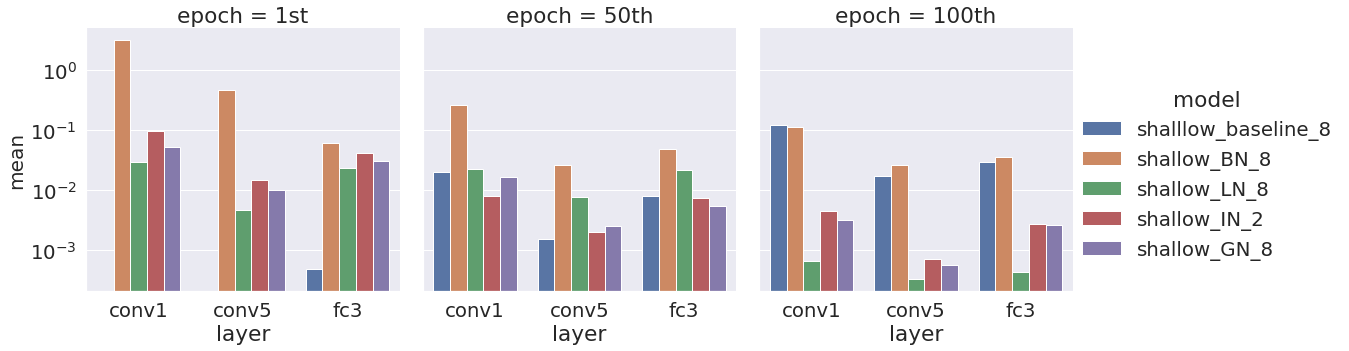

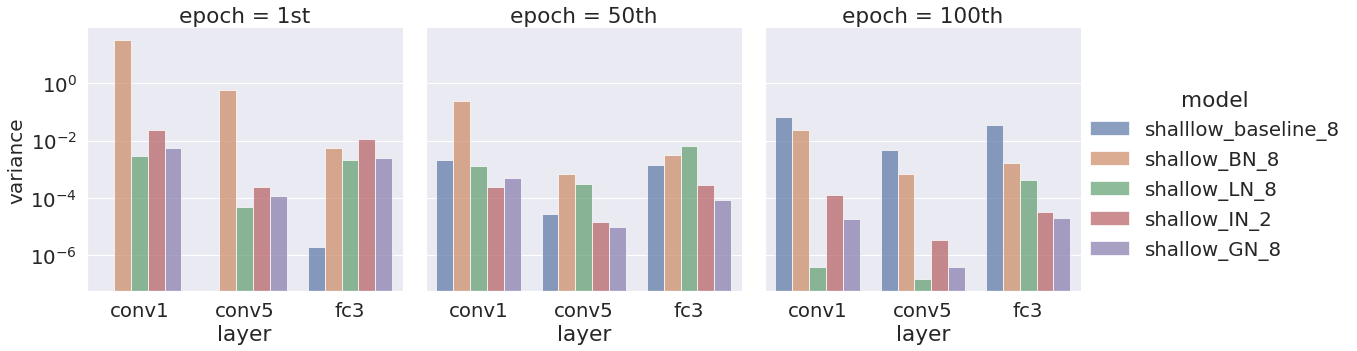

In [34]:
sns.set(font_scale=1.8)
g = sns.catplot(x="layer", y="mean", hue="model", col="epoch", data=df2, kind="bar").set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('mean', fontsize=20)
plt.savefig("shallow_mean_grad_bar_plot.png", dpi=100,bbox_inches="tight")

g = sns.catplot(x="layer", y="variance", hue="model", col="epoch", data=df2, kind="bar", alpha=0.7).set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('variance', fontsize=20)
plt.savefig("shallow_var_grad_bar_plot.png", dpi=100, bbox_inches="tight")

In [35]:
df3 = pd.read_csv("shallow_gradients_NM.csv", sep=";")

df3['mean'] = df3['mean'].str.replace(',','.')
df3['variance'] = df3['variance'].str.replace(',','.')

df3["mean"] = pd.to_numeric(df3["mean"])
df3["variance"] = pd.to_numeric(df3["variance"])

In [36]:
df3

,model,epoch,layer,mean,variance
0,shallow_ILM_LN_8,1st,conv1,0.010900,8.850000e-05
1,shallow_ILM_LN_8,1st,conv5,0.003890,3.200000e-05
2,shallow_ILM_LN_8,1st,fc3,0.027400,2.780000e-03
3,shallow_ILM_LN_8,50th,conv1,0.040000,1.956000e-03
4,shallow_ILM_LN_8,50th,conv5,0.011000,3.600000e-04
5,shallow_ILM_LN_8,50th,fc3,0.019500,1.300000e-03
6,shallow_ILM_LN_8,100th,conv1,0.003083,1.280000e-05
7,shallow_ILM_LN_8,100th,conv5,0.000983,4.240000e-06
8,shallow_ILM_LN_8,100th,fc3,0.007000,4.300000e-04
9,shallow_ILM_IN_8,1st,conv1,0.200000,1.080000e-01


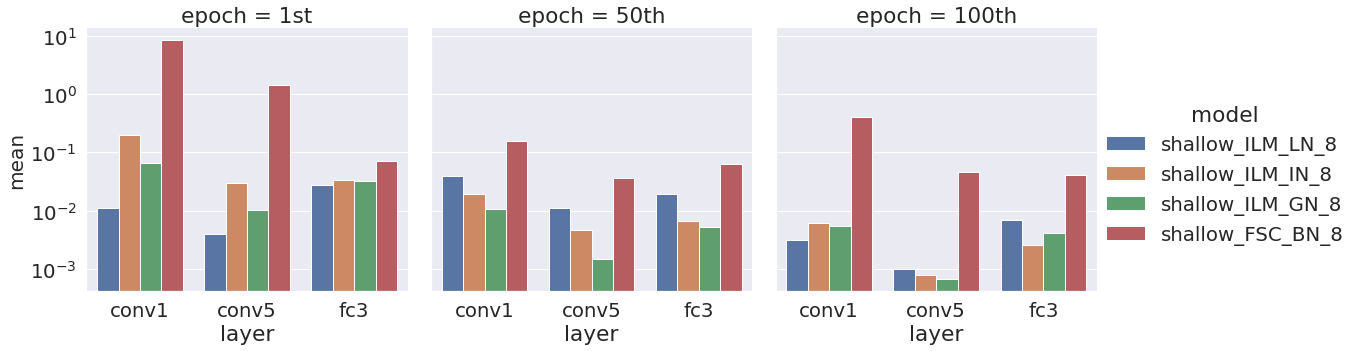

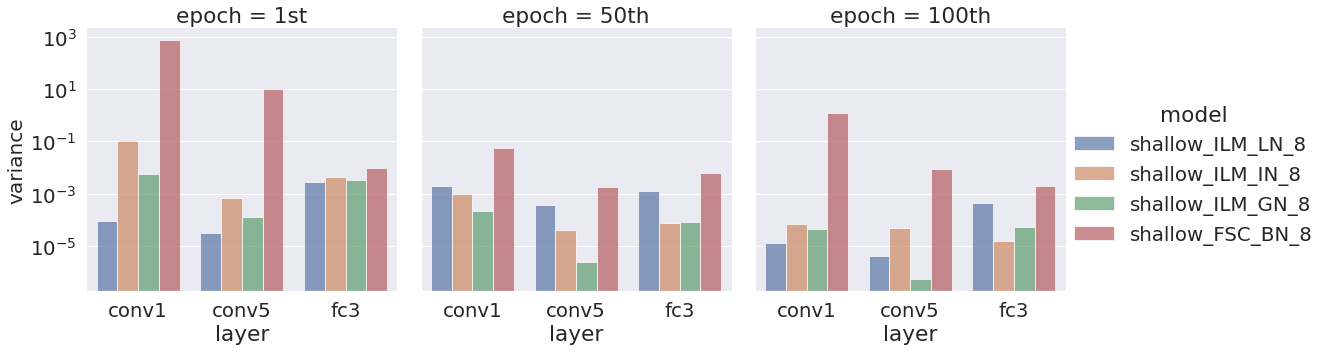

In [37]:
sns.set(font_scale=1.8)
g = sns.catplot(x="layer", y="mean", hue="model", col="epoch", data=df3, kind="bar").set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('mean', fontsize=20)
plt.savefig("shallow_NM_mean_grad_bar_plot.png", dpi=100,bbox_inches="tight")

g = sns.catplot(x="layer", y="variance", hue="model", col="epoch", data=df3, kind="bar", alpha=0.7).set(yscale="log")
ax1, ax2, ax3 = g.axes[0]
ax1.set_ylabel('variance', fontsize=20)
plt.savefig("shallow_NM_var_grad_bar_plot.png", dpi=100, bbox_inches="tight")